In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [19]:
(x_train, y_train), (x_test, y_test) = \
        tf.keras.datasets.mnist.load_data()

In [20]:
x_train = x_train /255 
x_test = x_test /255

In [21]:
x_train.shape

(60000, 28, 28)

## preparing the training pictures by rotating them randomly

In [40]:
rotated_x_train = []
angles_train = np.random.randint(0, 360, 60000)
angles_train_normalized = angles_train/360

In [41]:

for i in range(60000):
    x_train_img = Image.fromarray(x_train[i])
    rotated = Image.Image.rotate(x_train_img, angles_train[i])
    rotated_picture = np.array(rotated)
    rotated_x_train.append(rotated_picture)
    
    

In [24]:
#convert to tensor
rotated_x_train = tf.convert_to_tensor(rotated_x_train)

In [25]:
rotated_x_train.shape

TensorShape([60000, 28, 28])

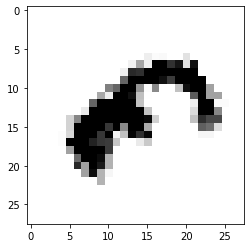

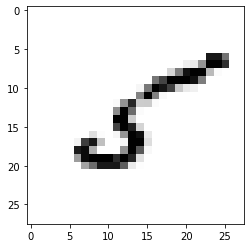

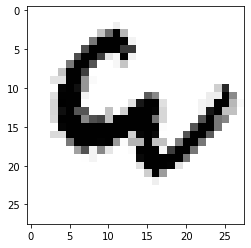

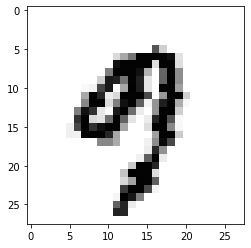

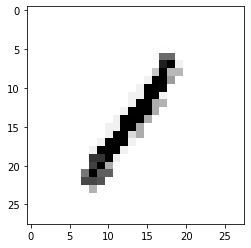

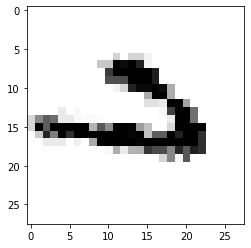

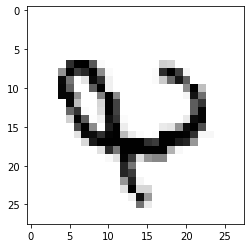

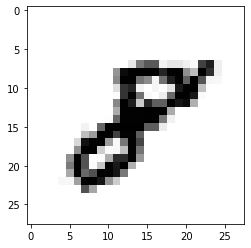

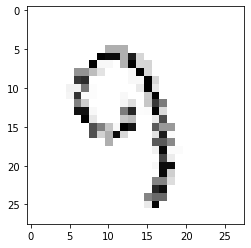

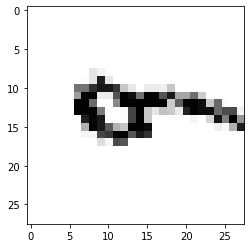

In [26]:
for i in range(10, 20): 
    plt.imshow( rotated_x_train[i], cmap='Greys')
    plt.show()

## preparing the test pictures by rotating them

In [11]:
rotated_x_test = []
angles_test = np.random.randint(0, 360, 10000)

In [12]:
for i in range(10000):
    x_test_img = Image.fromarray(x_test[i])
    rotated = Image.Image.rotate(x_test_img, angles_test[i])
    rotated_picture = np.array(rotated)
    rotated_x_test.append(rotated_picture)

In [13]:
#convert to tensor
rotated_x_test = tf.convert_to_tensor(rotated_x_test) 

In [14]:
rotated_x_test.shape

TensorShape([10000, 28, 28])

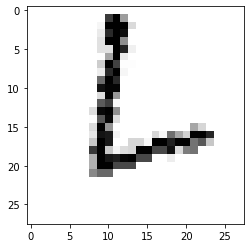

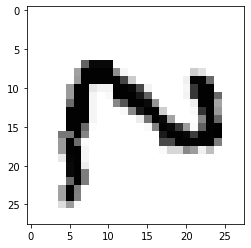

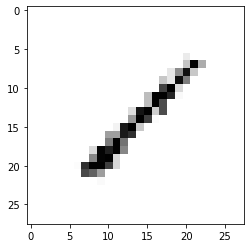

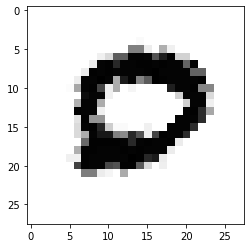

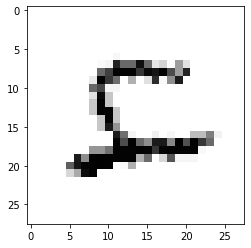

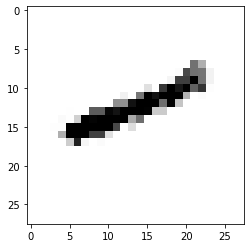

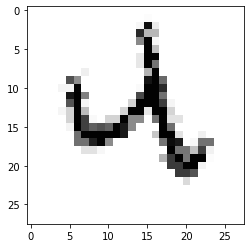

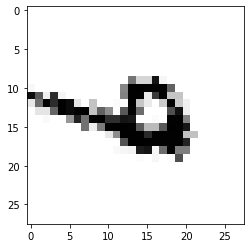

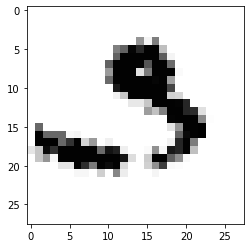

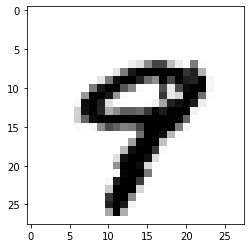

In [15]:
for i in range(10): 
    plt.imshow( rotated_x_test[i], cmap='Greys')
    plt.show()

In [27]:
angles_train.shape

(60000,)

## converting numerical labels to binary labels

In [28]:
angles_train_softmax = np.zeros(shape=(60000,360),dtype=np.float32)    #could be done with to_categorical ??
angles_test_softmax = np.zeros(shape=(10000,360),dtype=np.float32)


for i in range (360):
    angles_train_softmax[np.where(angles_train == i),i] = 1
    angles_test_softmax[np.where(angles_test == i),i] = 1

In [29]:
#convert to tensor
angles_train_softmax = tf.convert_to_tensor(angles_train_softmax) 
angles_test_softmax = tf.convert_to_tensor(angles_test_softmax)

In [30]:
angles_train_softmax.shape

TensorShape([60000, 360])

## Model

In [50]:
#expand dimension

rotated_x_train = tf.expand_dims(rotated_x_train, -1)
rotated_x_test = tf.expand_dims(rotated_x_test, -1)

In [32]:
rotated_x_train.shape

TensorShape([60000, 28, 28, 1])

In [46]:
model = tf.keras.Sequential([

        tf.keras.layers.Input(shape=(28,28,1)),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')

])

In [47]:
model.compile(optimizer='adam',
                loss='mean_squared_error',
                metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [51]:
model.fit(rotated_x_train, angles_train_normalized, batch_size = 128, epochs=10)  

predictions = model.predict(rotated_x_test)


print(tf.reduce_sum(
        tf.cast(
            tf.argmax(predictions,axis=1)==angles_test,
            tf.int16)).numpy())

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 338s 6ms/sample - loss: 0.0419 - accuracy: 0.0016
Epoch 2/10
60000/60000 [==============================] - 264s 4ms/sample - loss: 0.0319 - accuracy: 0.0015
Epoch 3/10
60000/60000 [==============================] - 263s 4ms/sample - loss: 0.0284 - accuracy: 0.0015
Epoch 4/10
60000/60000 [==============================] - 263s 4ms/sample - loss: 0.0257 - accuracy: 0.0016
Epoch 5/10
60000/60000 [==============================] - 262s 4ms/sample - loss: 0.0237 - accuracy: 0.0017
Epoch 6/10
60000/60000 [==============================] - 262s 4ms/sample - loss: 0.0226 - accuracy: 0.0018
Epoch 7/10
60000/60000 [==============================] - 263s 4ms/sample - loss: 0.0211 - accuracy: 0.0018
Epoch 8/10
60000/60000 [==============================] - 263s 4ms/sample - loss: 0.0202 - accuracy: 0.0018
Epoch 9/10
60000/60000 [==============================] - 260s 4ms/sample - loss: 0.0194 - accuracy: 0.0018
Epoch

ValueError: Error when checking input: expected input_3 to have 4 dimensions, but got array with shape (10000, 28, 28, 1, 1)

## testing the model

In [37]:
diff_arr = []
for i in range(10000):
    diff = abs(angles_test[i] - tf.argmax(predictions[i]))
    diff_arr.append(diff)
    
mean_diff = np.mean(diff_arr)


In [38]:
mean_diff

8.7258

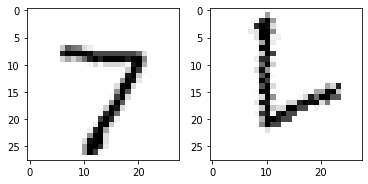

True angle:  210
Predicted angle:  210


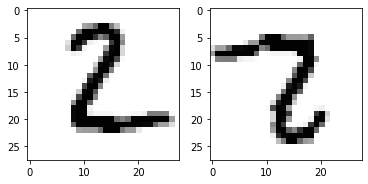

True angle:  186
Predicted angle:  186


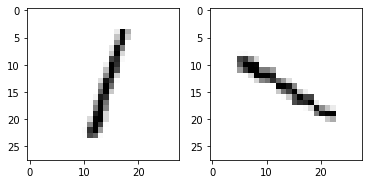

True angle:  255
Predicted angle:  254


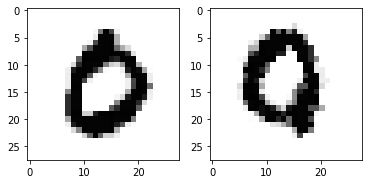

True angle:  206
Predicted angle:  206


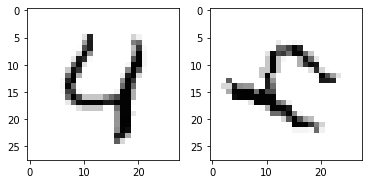

True angle:  255
Predicted angle:  255


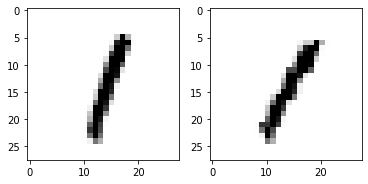

True angle:  349
Predicted angle:  349


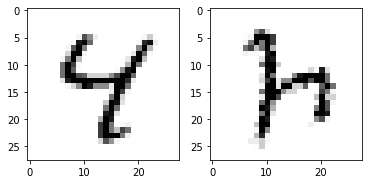

True angle:  202
Predicted angle:  201


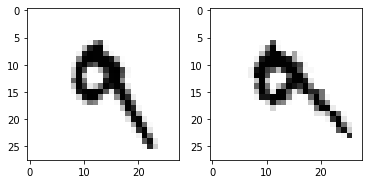

True angle:  14
Predicted angle:  15


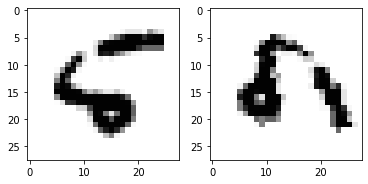

True angle:  286
Predicted angle:  286


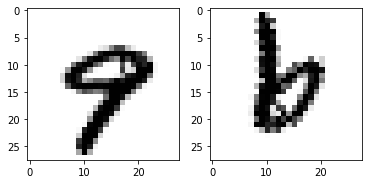

True angle:  217
Predicted angle:  216


In [39]:
for i in range(10):

    original_img = x_test[i]
    true_angle = np.random.randint(360)

    pil_x_train = Image.fromarray(original_img)
    rotated = Image.Image.rotate(pil_x_train, true_angle)
    rotated_picture = np.array(rotated)

    
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(original_img, cmap='Greys')
    f.add_subplot(1,2, 2)
    plt.imshow(rotated_picture, cmap='Greys')
    plt.show()
       
    print("True angle: ", true_angle)

    rotated_picture = np.expand_dims(rotated_picture, (-1,0))

    result = model.predict(rotated_picture)
    predicted_angle = np.argmax(result)
    print("Predicted angle: ", predicted_angle)
